# Chapter 3

In [1]:
from control.matlab import *

## 伝達関数モデルの記述

In [2]:
Np = [0, 1]      # 伝達関数の分子多項式の係数 (0*s + 1)
Dp = [1, 2, 3]   # 伝達関数の分母多項式の係数 (1*s^2 + 2*s + 3)
P = tf(Np, Dp)
print('P(s)=', P)

P(s)= 
      1
-------------
s^2 + 2 s + 3



In [3]:
P = tf([0, 1], [1, 2, 3])
print('P(s)=', P)

P(s)= 
      1
-------------
s^2 + 2 s + 3



### 練習問題

In [4]:
P = tf([1, 2], [1, 5, 3, 4])
P


        s + 2
---------------------
s^3 + 5 s^2 + 3 s + 4

分母多項式の展開

In [5]:
import sympy as sp
sp.init_printing()

s = sp.Symbol('s')
sp.expand( (s+1)*(s+2)**2, s)

In [6]:
P = tf([1, 3],[1, 5, 8, 4])
P


        s + 3
---------------------
s^3 + 5 s^2 + 8 s + 4

In [7]:
P1 = tf([1, 3], [0, 1])
P2 = tf([0, 1], [1, 1])
P3 = tf([0, 1], [1, 2])
P = P1 * P2 * P3**2
P


        s + 3
---------------------
s^3 + 5 s^2 + 8 s + 4

### 分母・分子多項式の係数の抽出

In [8]:
print(P.num)
print(P.den)

[[array([1., 3.])]]
[[array([1, 5, 8, 4])]]


In [9]:
[[numP]], [[denP]] = tfdata(P)
print(numP)
print(denP)

[1. 3.]
[1 5 8 4]


## 状態空間モデルの記述

In [10]:
A = '0 1; -1 -1'
B = '0; 1'
C = '1 0'
D = '0'
P = ss(A, B, C, D)
print(P)

A = [[ 0  1]
 [-1 -1]]

B = [[0]
 [1]]

C = [[1 0]]

D = [[0]]



In [11]:
A = [ [0, 1], [-1, -1] ]
B = [ [0], [1] ]
C = [ 1, 0 ]
D = [ 0 ]
P = ss(A, B, C, D)
print(P)

A = [[ 0  1]
 [-1 -1]]

B = [[0]
 [1]]

C = [[1 0]]

D = [[0]]



### 練習問題

In [12]:
A = '1 1 2; 2 1 1; 3 4 5'
B = '2; 0; 1'
C = '1 1 0'
D = '0'
P = ss(A, B, C, D)
print(P)

A = [[1 1 2]
 [2 1 1]
 [3 4 5]]

B = [[2]
 [0]
 [1]]

C = [[1 1 0]]

D = [[0]]



### A,B,C,D行列の抽出

In [13]:
print('A=', P.A)
print('B=', P.B)
print('C=', P.C)
print('D=', P.D)

A= [[1 1 2]
 [2 1 1]
 [3 4 5]]
B= [[2]
 [0]
 [1]]
C= [[1 1 0]]
D= [[0]]


In [14]:
sysA, sysB, sysC, sysD = ssdata(P)
print('A=', sysA)
print('B=', sysB)
print('C=', sysC)
print('D=', sysD)

A= [[1 1 2]
 [2 1 1]
 [3 4 5]]
B= [[2]
 [0]
 [1]]
C= [[1 1 0]]
D= [[0]]


## ブロック線図の結合

In [15]:
S1 = tf( [0, 1], [1, 1])
S2 = tf( [1, 1], [1, 1, 1])
print(S1)
print(S2)


  1
-----
s + 1


   s + 1
-----------
s^2 + s + 1



### 直列結合

In [16]:
S = S2 * S1
print('S=', S)

S = series(S1, S2)
print('S=', S)

S= 
        s + 1
---------------------
s^3 + 2 s^2 + 2 s + 1

S= 
        s + 1
---------------------
s^3 + 2 s^2 + 2 s + 1



分母分子の共通因子 s+1 が約分されない
この場合は，minreal を使う

In [17]:
S.minreal()


     1
-----------
s^2 + s + 1

あるいは，状態空間モデルに変換してから結合する

In [18]:
S1ss = ss(S1) # 状態空間モデルへの変換
S2ss = ss(S2) # 状態空間モデルへの変換

S = S1ss * S2ss
print(tf(S))
S = series(S1ss, S2ss)
print(tf(S))


     1
-----------
s^2 + s + 1


     1
-----------
s^2 + s + 1



### 並列結合

In [19]:
S = S1 + S2
print('S=', S)
S = parallel(S1, S2)
print('S=', S)

S= 
   2 s^2 + 3 s + 2
---------------------
s^3 + 2 s^2 + 2 s + 1

S= 
   2 s^2 + 3 s + 2
---------------------
s^3 + 2 s^2 + 2 s + 1



### フィードバック結合

In [20]:
S = S1*S2 / (1 + S1*S2)
print('S=', S)
S = feedback(S1*S2, 1)
print('S=', S)

S= 
         s^4 + 3 s^3 + 4 s^2 + 3 s + 1
-----------------------------------------------
s^6 + 4 s^5 + 9 s^4 + 13 s^3 + 12 s^2 + 7 s + 2

S= 
        s + 1
---------------------
s^3 + 2 s^2 + 3 s + 2



In [21]:
print('S=', S.minreal())

S= 
     1
-----------
s^2 + s + 2



ポジティブフィードバックの場合

In [22]:
S = feedback(S1*S2, 1, sign = 1)
print(S.minreal())


   1
-------
s^2 + s



### 練習問題

In [23]:
S1 = tf(1, [1, 1])
S2 = tf(1, [1, 2])
S3 = tf([3, 1], [1, 0])
S4 = tf([2, 0], [0, 1])

print('S1=', S1)
print('S2=', S2)
print('S3=', S3)
print('S4=', S4)

S12 = feedback(S1, S2)
S123 = series(S12, S3)
S = feedback(S123, S4)
print('S=', S)

S1= 
  1
-----
s + 1

S2= 
  1
-----
s + 2

S3= 
3 s + 1
-------
   s

S4= 
2 s
---
 1

S= 
  3 s^2 + 7 s + 2
--------------------
7 s^3 + 17 s^2 + 7 s



## 補遺（実現問題とプロパー性）

### 実現問題

In [24]:
P = tf( [0, 1], [1, 1, 1])

Pss = tf2ss(P) # 伝達関数モデルから状態空間モデルへの変換
print(Pss)
Ptf = ss2tf(Pss) # 状態空間モデルから伝達関数モデルへの変換
print(Ptf)

A = [[-1. -1.]
 [ 1.  0.]]

B = [[-1.]
 [ 0.]]

C = [[ 0. -1.]]

D = [[0.]]


     1
-----------
s^2 + s + 1



### 可制御正準形

In [25]:
from control import canonical_form

A = '1 2 3; 3 2 1; 4 5 0'
B = '1; 0; 1'
C = '0 2 1'
D = '0'
Pss = ss(A, B, C, D)

Pr, T = canonical_form(Pss, form='reachable')
print(Pss)
print('------------')
print(Pr)

A = [[1 2 3]
 [3 2 1]
 [4 5 0]]

B = [[1]
 [0]
 [1]]

C = [[0 2 1]]

D = [[0]]

------------
A = [[ 3. 21. 24.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]

B = [[1.]
 [0.]
 [0.]]

C = [[ 1.  9. 27.]]

D = [[0]]



In [26]:
### 可観測正準形

In [27]:
Po, T = canonical_form(Pss, form='observable')
print(Po)

A = [[ 3.  1.  0.]
 [21.  0.  1.]
 [24.  0.  0.]]

B = [[ 1.]
 [ 9.]
 [27.]]

C = [[1. 0. 0.]]

D = [[0]]



### プロパー性

In [28]:
S1 = tf([1, 1], [0, 1])
S2 = tf([0, 1], [1, 1])

S = series(S1, S2)
print(S.minreal())


1
-
1



In [29]:
print(S2)
tf2ss(S2)


  1
-----
s + 1



A = [[-1.]]

B = [[1.]]

C = [[1.]]

D = [[0.]]

In [30]:
print(S1)
tf2ss(S1)


s + 1
-----
  1



A = []

B = []

C = []

D = [[1.]]

## ラプラス変換

In [31]:
import sympy as sp
s = sp.Symbol('s')
t = sp.Symbol('t', positive=True)
sp.laplace_transform(1, t, s)

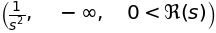

In [32]:
sp.laplace_transform(t, t, s)

In [33]:
a = sp.Symbol('a', real=True)
sp.laplace_transform(sp.exp(-a*t), t, s)

In [34]:
w = sp.Symbol('w', real=True)
sp.laplace_transform(sp.sin(w*t), t, s)

In [35]:
sp.laplace_transform(sp.cos(w*t), t, s)

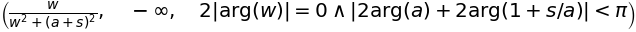

In [36]:
sp.laplace_transform(sp.exp(-a*t)*sp.sin(w*t), t, s)

## 逆ラプラス変換

In [37]:
sp.inverse_laplace_transform(1/s, s, t)

In [38]:
sp.inverse_laplace_transform(1/s**2, s, t)

In [39]:
sp.inverse_laplace_transform(1/(s+a), s, t)

In [40]:
sp.inverse_laplace_transform(w/(s**2+w**2), s, t)

In [41]:
sp.inverse_laplace_transform(s/(s**2+w**2), s, t)

In [42]:
sp.inverse_laplace_transform(w/((s+a)**2+w**2), s, t)